# Task - II
### Author: **Allen Ben Philipose**

## Import Libraries

In [99]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly_express as px
import matplotlib.pyplot as plt
import category_encoders as ce

In [122]:
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix
from sklearn.metrics import classification_report, f1_score 
from sklearn import preprocessing
from sklearn.cluster import KMeans

In [101]:
from sklearn.neighbors import DistanceMetric
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score

In [102]:
import warnings
warnings.filterwarnings('ignore')

## Dataset

In [103]:
allen = pd.read_csv("Dataset.csv")

In [104]:
allen.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [105]:
allen.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [106]:
allen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


## Exploratory Data Analysis

In [107]:
allen_corr = allen.corr()

In [108]:
allen_corr.style.background_gradient(cmap='coolwarm', axis=None)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


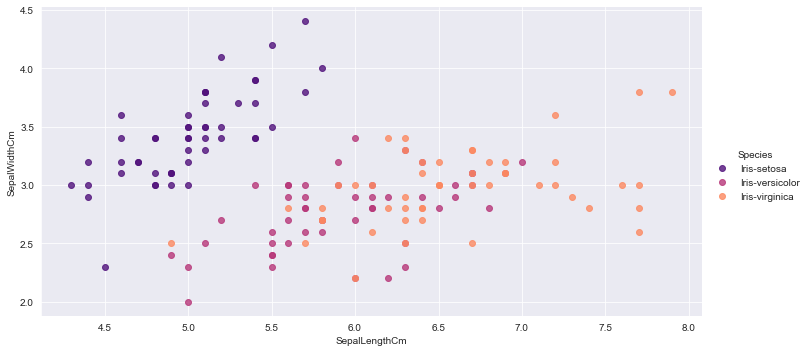

In [109]:
sns.set_style('darkgrid')
sns.lmplot('SepalLengthCm', 'SepalWidthCm', data=allen, hue='Species',
           palette='magma', size=5, aspect=2, fit_reg=False)

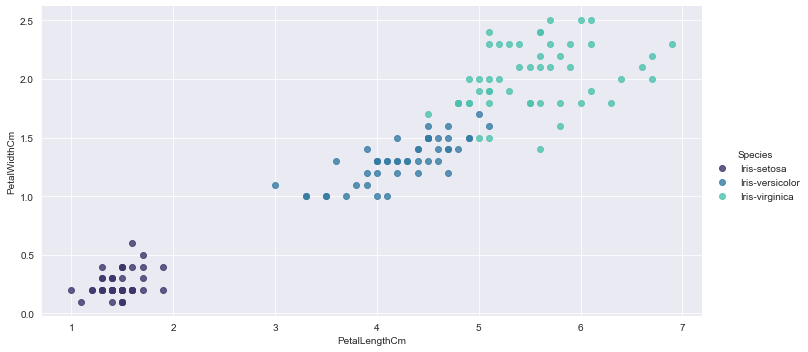

In [110]:
sns.set_style('darkgrid')
sns.lmplot('PetalLengthCm', 'PetalWidthCm', data=allen, hue='Species',
           palette='mako', size=5, aspect=2, fit_reg=False)

## K-Means

In [111]:
inertia = []
sa = []
for n in range(2,15):
    model = KMeans(n_clusters = n, random_state = 0, algorithm = 'elkan')
    model.fit(allen.drop(['Id', 'Species'], axis=1))
    cluster_labels = model.fit_predict(allen.drop(['Id', 'Species'], axis=1))
    inertia.append(model.inertia_)
    sa.append(silhouette_score(allen.drop(['Id', 'Species'], axis=1), cluster_labels))

#### Elbow Method

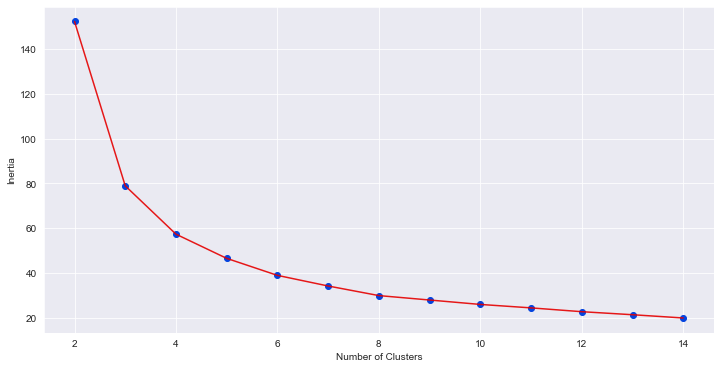

In [112]:
plt.figure(figsize = (12,6))
plt.plot(np.arange(2,15), inertia, 'o', c = sns.xkcd_rgb['blue'])
plt.plot(np.arange(2,15), inertia, '-', c = sns.xkcd_rgb['red'], alpha = 0.9)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

#### Silhouette Method

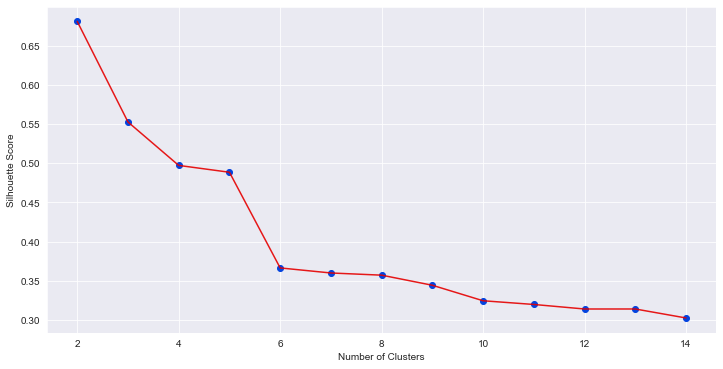

In [113]:
plt.figure(figsize = (12,6))
plt.plot(np.arange(2,15), sa, 'o', c = sns.xkcd_rgb['blue'])
plt.plot(np.arange(2,15), sa, '-', c = sns.xkcd_rgb['red'], alpha = 0.9)
plt.xlabel('Number of Clusters') , plt.ylabel('Silhouette Score')
plt.show()

## Model (n=3)

In [114]:
model = KMeans(n_clusters = 3, random_state = 0, algorithm = "elkan")
model.fit(allen.drop(['Id', 'Species'], axis=1))

KMeans(algorithm='elkan', n_clusters=3, random_state=0)

In [115]:
allen1 = allen
allen1['Cluster'] = model.labels_
allen1.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Cluster
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1


In [116]:
model.cluster_centers_

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

## Encoding

In [168]:
encoder = ce.OrdinalEncoder(cols=['Species'], return_df=True, mapping=[{'col':'Species',
'mapping':{'Iris-setosa':1, 'Iris-versicolor':2, 'Iris-virginica':0}}])

In [169]:
allen2 = encoder.fit_transform(allen1)
allen2['Species'] = allen2['Species'].astype(int)
allen2.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Cluster
0,1,5.1,3.5,1.4,0.2,1,1
1,2,4.9,3.0,1.4,0.2,1,1
2,3,4.7,3.2,1.3,0.2,1,1
3,4,4.6,3.1,1.5,0.2,1,1
4,5,5.0,3.6,1.4,0.2,1,1


## Metrics

In [170]:
c = confusion_matrix(allen2['Species'], allen2['Cluster'])
print(c)

[[36  0 14]
 [ 0 50  0]
 [ 2  0 48]]


In [172]:
allen3 = pd.DataFrame({
        'Model':'K-Means',
        'No. of Clusters':["3"],
        'Accuracy':[(c[0,0]+c[1,1]+c[2,2])/sum(sum(c))],
        'F1 Score':[f1_score(allen2['Species'],allen2['Cluster'],average='weighted')],
        'Silhouette Score':[silhouette_score(allen.drop(['Id', 'Species'],axis=1),
         model.fit_predict(allen.drop(['Id', 'Species'], axis=1)))]})
allen3.head()



,Model,No. of Clusters,Accuracy,F1 Score,Silhouette Score
0,K-Means,3,0.893333,0.891775,0.684936


## Plot

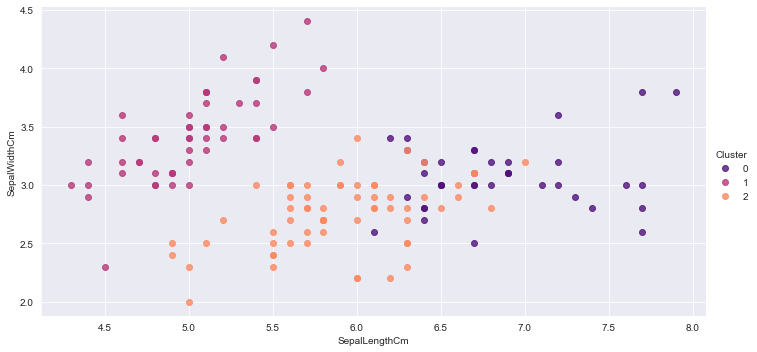

In [174]:
sns.set_style('darkgrid')
sns.lmplot('SepalLengthCm', 'SepalWidthCm', data=allen, hue='Cluster',
           palette='magma', size=5, aspect=2, fit_reg=False)

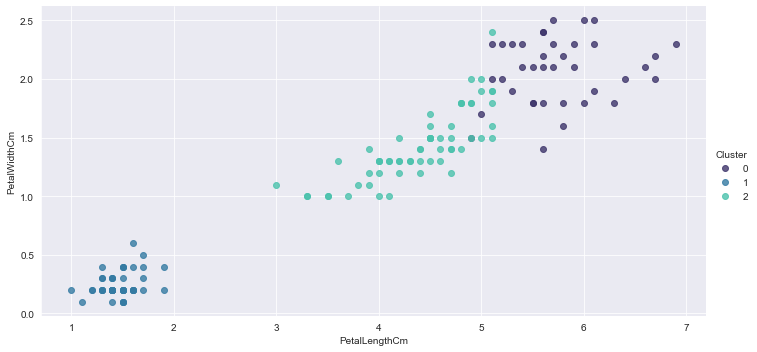

In [175]:
sns.set_style('darkgrid')
sns.lmplot('PetalLengthCm', 'PetalWidthCm', data=allen, hue='Cluster',
           palette='mako', size=5, aspect=2, fit_reg=False)